In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import vaderSentiment

In [3]:
analyzer = SentimentIntensityAnalyzer()

In [8]:
df = pd.read_csv('../data/top_21_businesses.csv', sep='\t')

In [9]:
[col for col in df]

['business_id',
 'cool',
 'date',
 'funny',
 'review_id',
 'stars',
 'text',
 'useful',
 'user_id',
 'name',
 'price',
 'rating',
 'review_count']

In [10]:
for idx, row in df.iterrows():
    df.loc[idx, 'vader'] = analyzer.polarity_scores(row['text'])['compound']

In [11]:
df.to_csv('../cleaned_data/top_21_businesses.csv', sep='\t')

In [12]:
x = df['stars']
y = df['vader']
fit = np.polyfit(x, y, 1)
fit_fx = np.poly1d(fit)

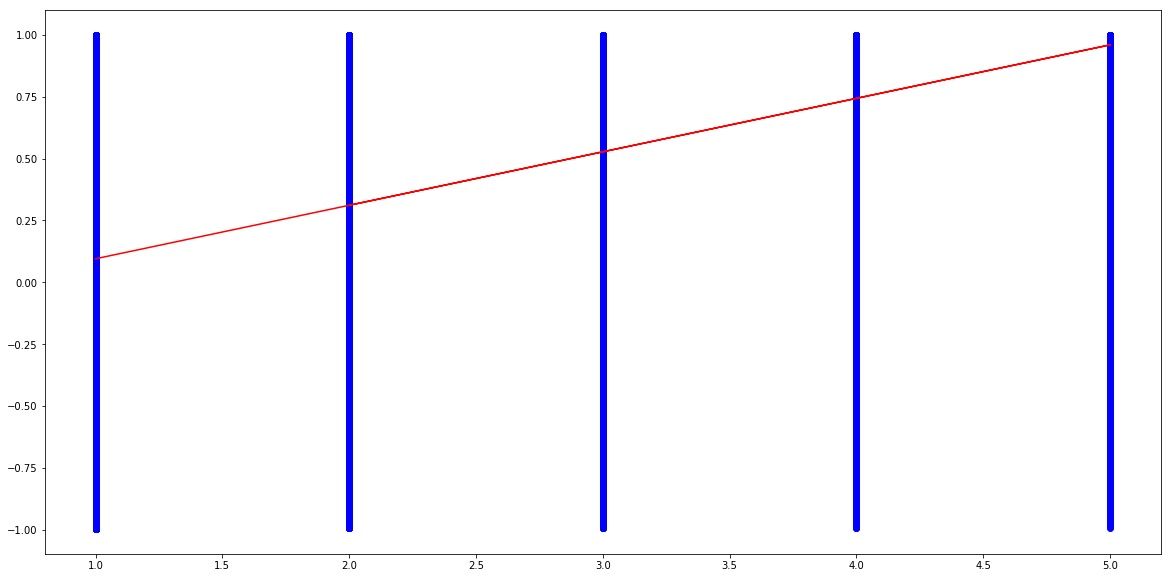

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(x, y, 'bo', x, fit_fx(x), 'r')

In [ ]:
starfunc = np.poly1d(np.polyfit(df['stars'], df['useful'], 1))
plt.plot(df['stars'], df['useful'], 'bo', df['stars'], starfunc(df['stars']), 'r')

In [ ]:
usefunc = np.poly1d(np.polyfit(df['useful'], df['funny'], 1))
plt.plot(df['useful'], df['funny'], 'bo', df['useful'], usefunc(df['useful']), 'r')

In [ ]:
funfunc = np.poly1d(np.polyfit(df['funny'], df['cool'], 1))
plt.plot(df['funny'], df['cool'], 'bo', df['funny'], funfunc(df['funny']), 'r')
plt.xlabel('Funny')